<a href="https://colab.research.google.com/github/Lance-Gamier/Physics_Informed_Neural_Networks/blob/main/PINN_PDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics Informed Neural Networks (PINN) for Partial Differential Equations (PDE)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
class PINN(tf.keras.Model):
  def __init__(self):
    super(PINN, self).__init__()
    self.hidden1 = tf.keras.layers.Dense(20, activation = 'tanh')
    self.hidden2 = tf.keras.layers.Dense(20, activation = 'tanh')
    self.out = tf.keras.layers.Dense(1)

  def call(self, x, y):
    inputs = tf.concat([x, y], axis = 1)
    x = self.hidden1(inputs)
    x = self.hidden2(x)
    return self.out(x)

In [ ]:
def train(model, epochs=10000):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            x_train = tf.linspace(0.0, 1.0, num=50)[:, tf.newaxis]
            y_train = tf.linspace(0.0, 1.0, num=50)[:, tf.newaxis]
            x_train, y_train = tf.meshgrid(x_train, y_train)
            x_train = tf.reshape(x_train, (-1, 1))
            y_train = tf.reshape(y_train, (-1, 1))
            x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
            y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
            loss = loss_fn(x_train, y_train, model(x_train, y_train))
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Example 1

In [ ]:
def loss_fn(x, y, u_pred):
    with tf.GradientTape() as tape:
        tape.watch(x)
        u_pred = model(x, y)
        u_x = tape.gradient(u_pred, x)  # Compute the gradient of u_pred w.r.t. x

    # Define the PDE residual
    f = u_x + u_pred

    # No boundary condition specified, so only PDE residual is enforced
    total_loss = tf.reduce_mean(tf.square(f))
    return total_loss

In [ ]:
model = PINN()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
train(model)

Epoch 0, Loss: 0.5141969919204712
Epoch 100, Loss: 0.0006258148932829499
Epoch 200, Loss: 0.00012888603669125587
Epoch 300, Loss: 0.00012387114111334085
Epoch 400, Loss: 0.0001182040577987209
Epoch 500, Loss: 0.0001121120949392207
Epoch 600, Loss: 0.00010577301145531237
Epoch 700, Loss: 9.93271532934159e-05
Epoch 800, Loss: 9.288278670283034e-05
Epoch 900, Loss: 8.65241454448551e-05
Epoch 1000, Loss: 8.031435572775081e-05
Epoch 1100, Loss: 7.430034747812897e-05
Epoch 1200, Loss: 6.851608486613259e-05
Epoch 1300, Loss: 6.298550579231232e-05
Epoch 1400, Loss: 5.772374788648449e-05
Epoch 1500, Loss: 5.274006616673432e-05
Epoch 1600, Loss: 4.80384987895377e-05
Epoch 1700, Loss: 4.361962783150375e-05
Epoch 1800, Loss: 3.948143057641573e-05
Epoch 1900, Loss: 3.561918128980324e-05
Epoch 2000, Loss: 3.202694279025309e-05
Epoch 2100, Loss: 2.8697353627649136e-05
Epoch 2200, Loss: 2.5622448447393253e-05
Epoch 2300, Loss: 2.279302862007171e-05
Epoch 2400, Loss: 2.0199615391902626e-05
Epoch 2500, 

In [ ]:
x_test = np.linspace(0.0, 1.0, 100)[:, np.newaxis]
y_test = np.linspace(0.0, 1.0, 100)[:, np.newaxis]
x_test, y_test = np.meshgrid(x_test, y_test)
x_test_flat = tf.convert_to_tensor(x_test.reshape(-1, 1), dtype=tf.float32)
y_test_flat = tf.convert_to_tensor(y_test.reshape(-1, 1), dtype=tf.float32)
u_pred_flat = model(x_test_flat, y_test_flat).numpy()
u_pred = u_pred_flat.reshape(x_test.shape)

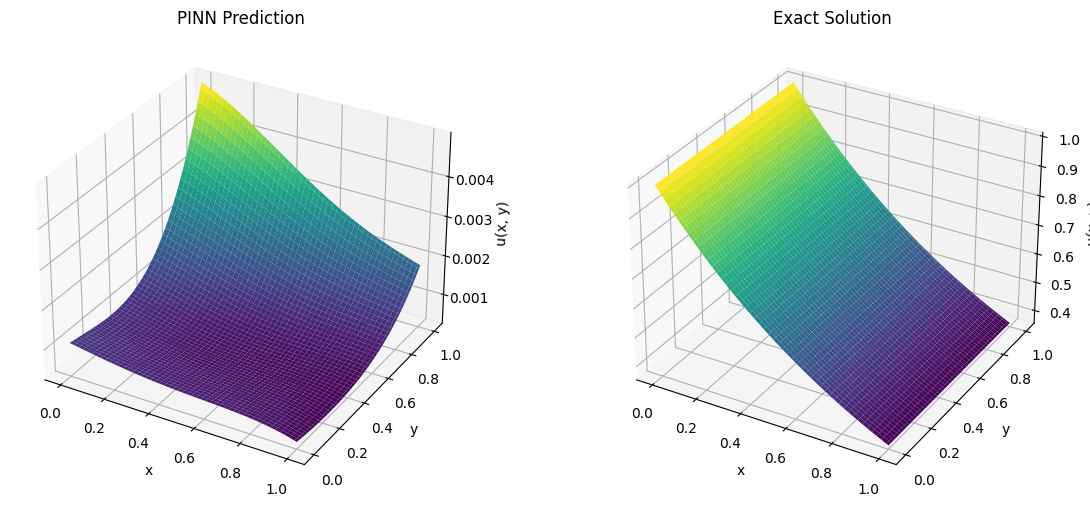

In [ ]:
def exact_solution(x, y):
    return np.exp(-x)

u_exact = exact_solution(x_test, y_test)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_test, y_test, u_pred, cmap='viridis')
ax1.set_title('PINN Prediction')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u(x, y)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_test, y_test, u_exact, cmap='viridis')
ax2.set_title('Exact Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u(x, y)')

plt.show()

Example 2

In [ ]:
def loss_fn(x, y, u_pred):
    with tf.GradientTape() as tape:
        tape.watch(x)
        u_pred = model(x, y)
        u_x = tape.gradient(u_pred, x)  # Compute the gradient of u_pred w.r.t. x

    # Define the PDE residual
    f = u_x - u_pred

    # Total loss (only PDE residual in this case)
    total_loss = tf.reduce_mean(tf.square(f))
    return total_loss

In [ ]:
model = PINN()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
train(model)

Epoch 0, Loss: 0.00020661504822783172
Epoch 100, Loss: 2.0030473024235107e-05
Epoch 200, Loss: 6.266615400818409e-06
Epoch 300, Loss: 3.0176925065461546e-06
Epoch 400, Loss: 1.5435688283105264e-06
Epoch 500, Loss: 8.314794968100614e-07
Epoch 600, Loss: 5.164087610864954e-07
Epoch 700, Loss: 3.7782211848025327e-07
Epoch 800, Loss: 3.059606967781292e-07
Epoch 900, Loss: 2.5729312369549007e-07
Epoch 1000, Loss: 2.178581866019158e-07
Epoch 1100, Loss: 1.8394409551092394e-07
Epoch 1200, Loss: 1.546429899690338e-07
Epoch 1300, Loss: 1.2962146911377204e-07
Epoch 1400, Loss: 1.0857948495868186e-07
Epoch 1500, Loss: 9.116494936733943e-08
Epoch 1600, Loss: 7.698165660485756e-08
Epoch 1700, Loss: 6.559455556498506e-08
Epoch 1800, Loss: 6.262087737241018e-08
Epoch 1900, Loss: 5.1675968393283256e-08
Epoch 2000, Loss: 4.6355925320540337e-08
Epoch 2100, Loss: 1.208775728400724e-07
Epoch 2200, Loss: 4.066578540573573e-08
Epoch 2300, Loss: 3.7797189378352414e-08
Epoch 2400, Loss: 7.76061187934829e-06
E

In [ ]:
x_test = np.linspace(0.0, 1.0, 100)[:, np.newaxis]
y_test = np.linspace(0.0, 1.0, 100)[:, np.newaxis]
x_test, y_test = np.meshgrid(x_test, y_test)
x_test_flat = tf.convert_to_tensor(x_test.reshape(-1, 1), dtype=tf.float32)
y_test_flat = tf.convert_to_tensor(y_test.reshape(-1, 1), dtype=tf.float32)
u_pred_flat = model(x_test_flat, y_test_flat).numpy()
u_pred = u_pred_flat.reshape(x_test.shape)

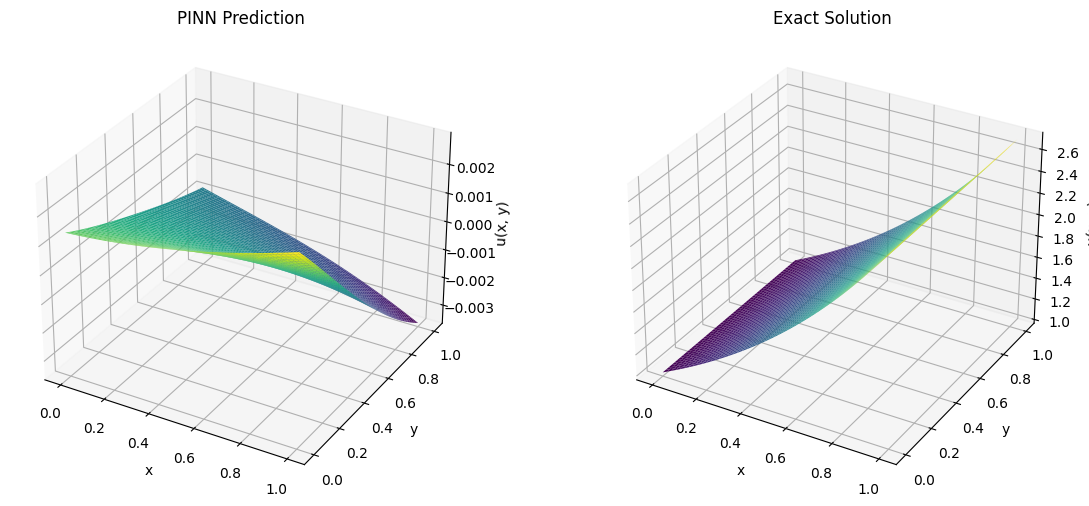

In [ ]:
def exact_solution(x, y):
    return np.exp(x)

u_exact = exact_solution(x_test, y_test)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_test, y_test, u_pred, cmap='viridis')
ax1.set_title('PINN Prediction')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u(x, y)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_test, y_test, u_exact, cmap='viridis')
ax2.set_title('Exact Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u(x, y)')

plt.show()